In [1]:
# Once Upon a time, there was a titanic dataset...

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset
dataset = pd.read_csv("dsdatasets/train.csv")

In [3]:
# NOTEBOOK SETTINGS
import warnings

# Enable background plot grids
sns.set_style("whitegrid")
warnings.filterwarnings('ignore') # Ignore warnings from cell outputs

In [4]:
# taking a look into the dataset...
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Brief Description Of The Variables
### Survived: 1 for survived and 0 for didn't survive
### Pclass (ticket class): 1 for 1st, 2 for 2nd, 3 for 3rd class
### sibsp: Number of siblings or spouses on board
### parch: number of parents / children aboard the Titanic
### Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
# Here I,am going to treat Pclass, sibsp, parch as categrical columns since they take discrete values
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset['SibSp'] = dataset['SibSp'].astype('category')
dataset['Parch'] = dataset['Parch'].astype('category')

In [6]:
# a look at its structure...
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(3), float64(2), int64(2), object(5)
memory usage: 66.2+ KB


In [7]:
# a closer look into its guts... (SUMMARY STATISTICS)
dataset = dataset.drop('PassengerId', axis=1)
dataset.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [8]:
# BIVARIATE NUMERICAL HELPER FUNCTION
def bivariate_hist_box(dataframe, target_var, num_var):
    dummy_target_var = dataframe[target_var]
    dummy_target_var = dummy_target_var.replace({
        0: "Didn't survive",
        1: "Survived"
    })
    # Plot layout
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    # Histogram
    sns.histplot(data=dataframe, x=num_var, hue=dummy_target_var, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution Of {num_var}")
    # BoxPlot
    sns.boxplot(data=dataframe, y=num_var, x=dummy_target_var, hue=dummy_target_var, ax=axes[1])
    axes[1].set_title(f"Boxplot of Survival Against {num_var}")
    plt.show()

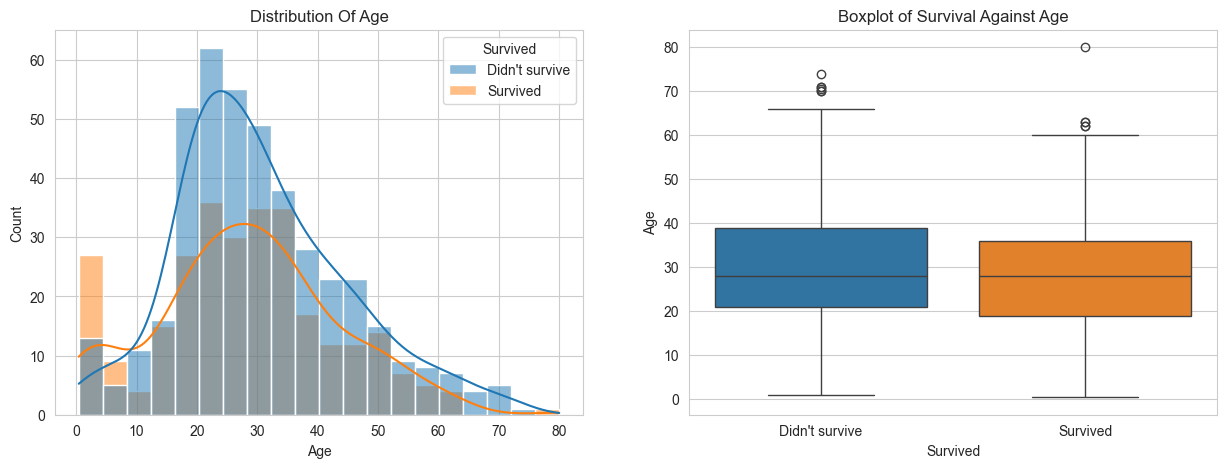

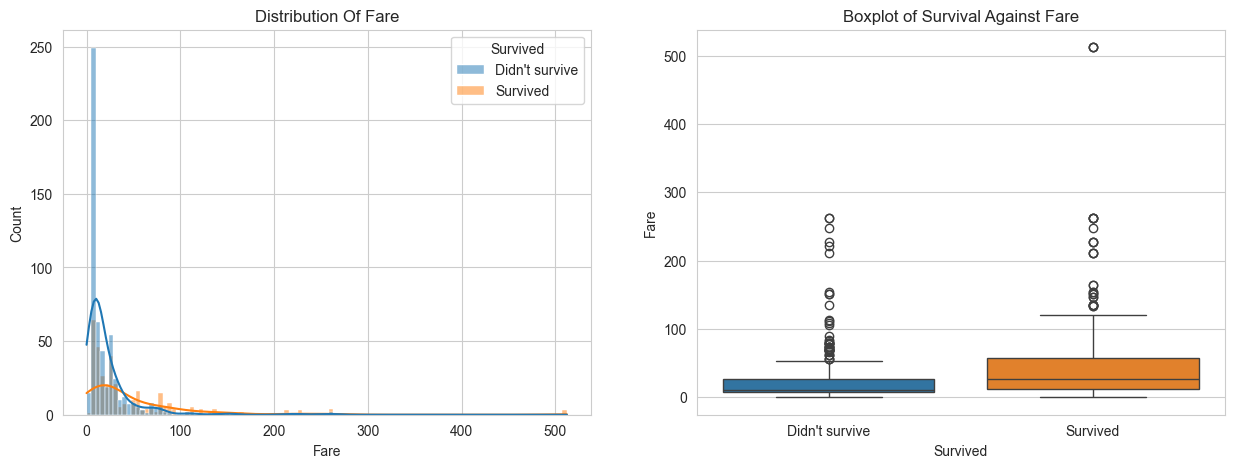

In [9]:
# Bivariate For Age & Fare
bivariate_hist_box(dataframe=dataset, target_var="Survived", num_var="Age")
bivariate_hist_box(dataframe=dataset, target_var="Survived", num_var="Fare")

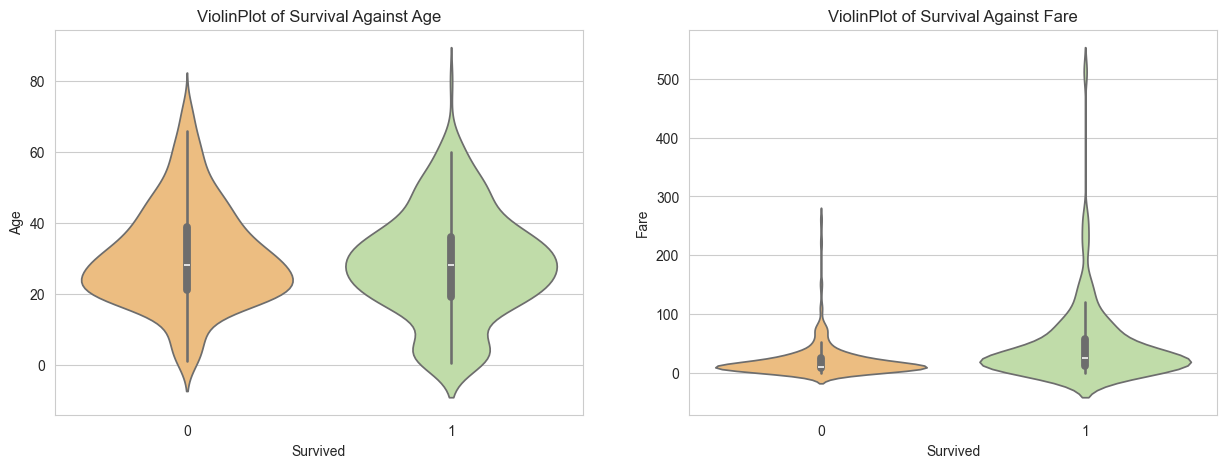

In [64]:
# VIOLIN PLOTS
fig, axes = plt.subplots(1, 2, figsize=[15, 5])
sns.violinplot(data=dataset, x="Survived", y="Age", palette="Spectral", ax=axes[0])
axes[0].set_title(f"ViolinPlot of Survival Against Age")
sns.violinplot(data=dataset, x="Survived", y="Fare", palette="Spectral", ax=axes[1])
axes[1].set_title(f"ViolinPlot of Survival Against Fare")
plt.show()

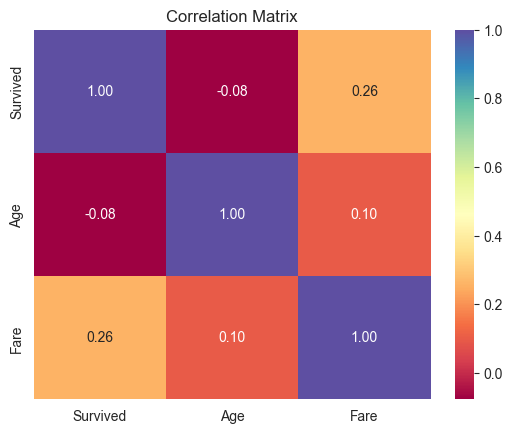

In [10]:
#Correlation Matrix Between Numerical Variables
sns.heatmap(
    dataset.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap="Coo",
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()

In [56]:
# BIVARIATE CATEGORICAL HELPER FUNCTION

def bivariate_cat(dataframe, target_var):
    col_name_list = dataframe.select_dtypes(exclude=np.number).columns.tolist()
    if target_var in col_name_list:
        col_name_list.remove(target_var)
    # Diagram Layout
    n_rows = int(np.ceil(len(col_name_list)/2))
    fig, axes = plt.subplots(n_rows, 2, figsize=(25, 30))
    axes = axes.flatten()

    for i, col in enumerate(col_name_list):
        # Calculate percentage of survival
        percentage_df = dataframe.groupby(col)[target_var].mean().reset_index()
        percentage_df[target_var] = percentage_df[target_var] * 100
        # Draw Barchat
        sns.barplot(data=percentage_df, x=col, y=target_var, palette='Set2', ax=axes[i])
        axes[i].set_title(f"{col} Against {target_var} Percentage", fontsize=20)
        axes[i].set_ylabel(f'Survival %', fontsize=20)
        axes[i].set_yticks(axes[i].get_yticks(), axes[i].get_yticklabels(),fontsize=20)
        axes[i].set_xlabel(col, fontsize=20)
        axes[i].set_xticks(axes[i].get_xticks(), axes[i].get_xticklabels(),fontsize=20)

            
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.2) # Adjust spacing between plots
    plt.show()
        
relevant_cat = dataset.drop(["Name", "Cabin", "Ticket"], axis=1)


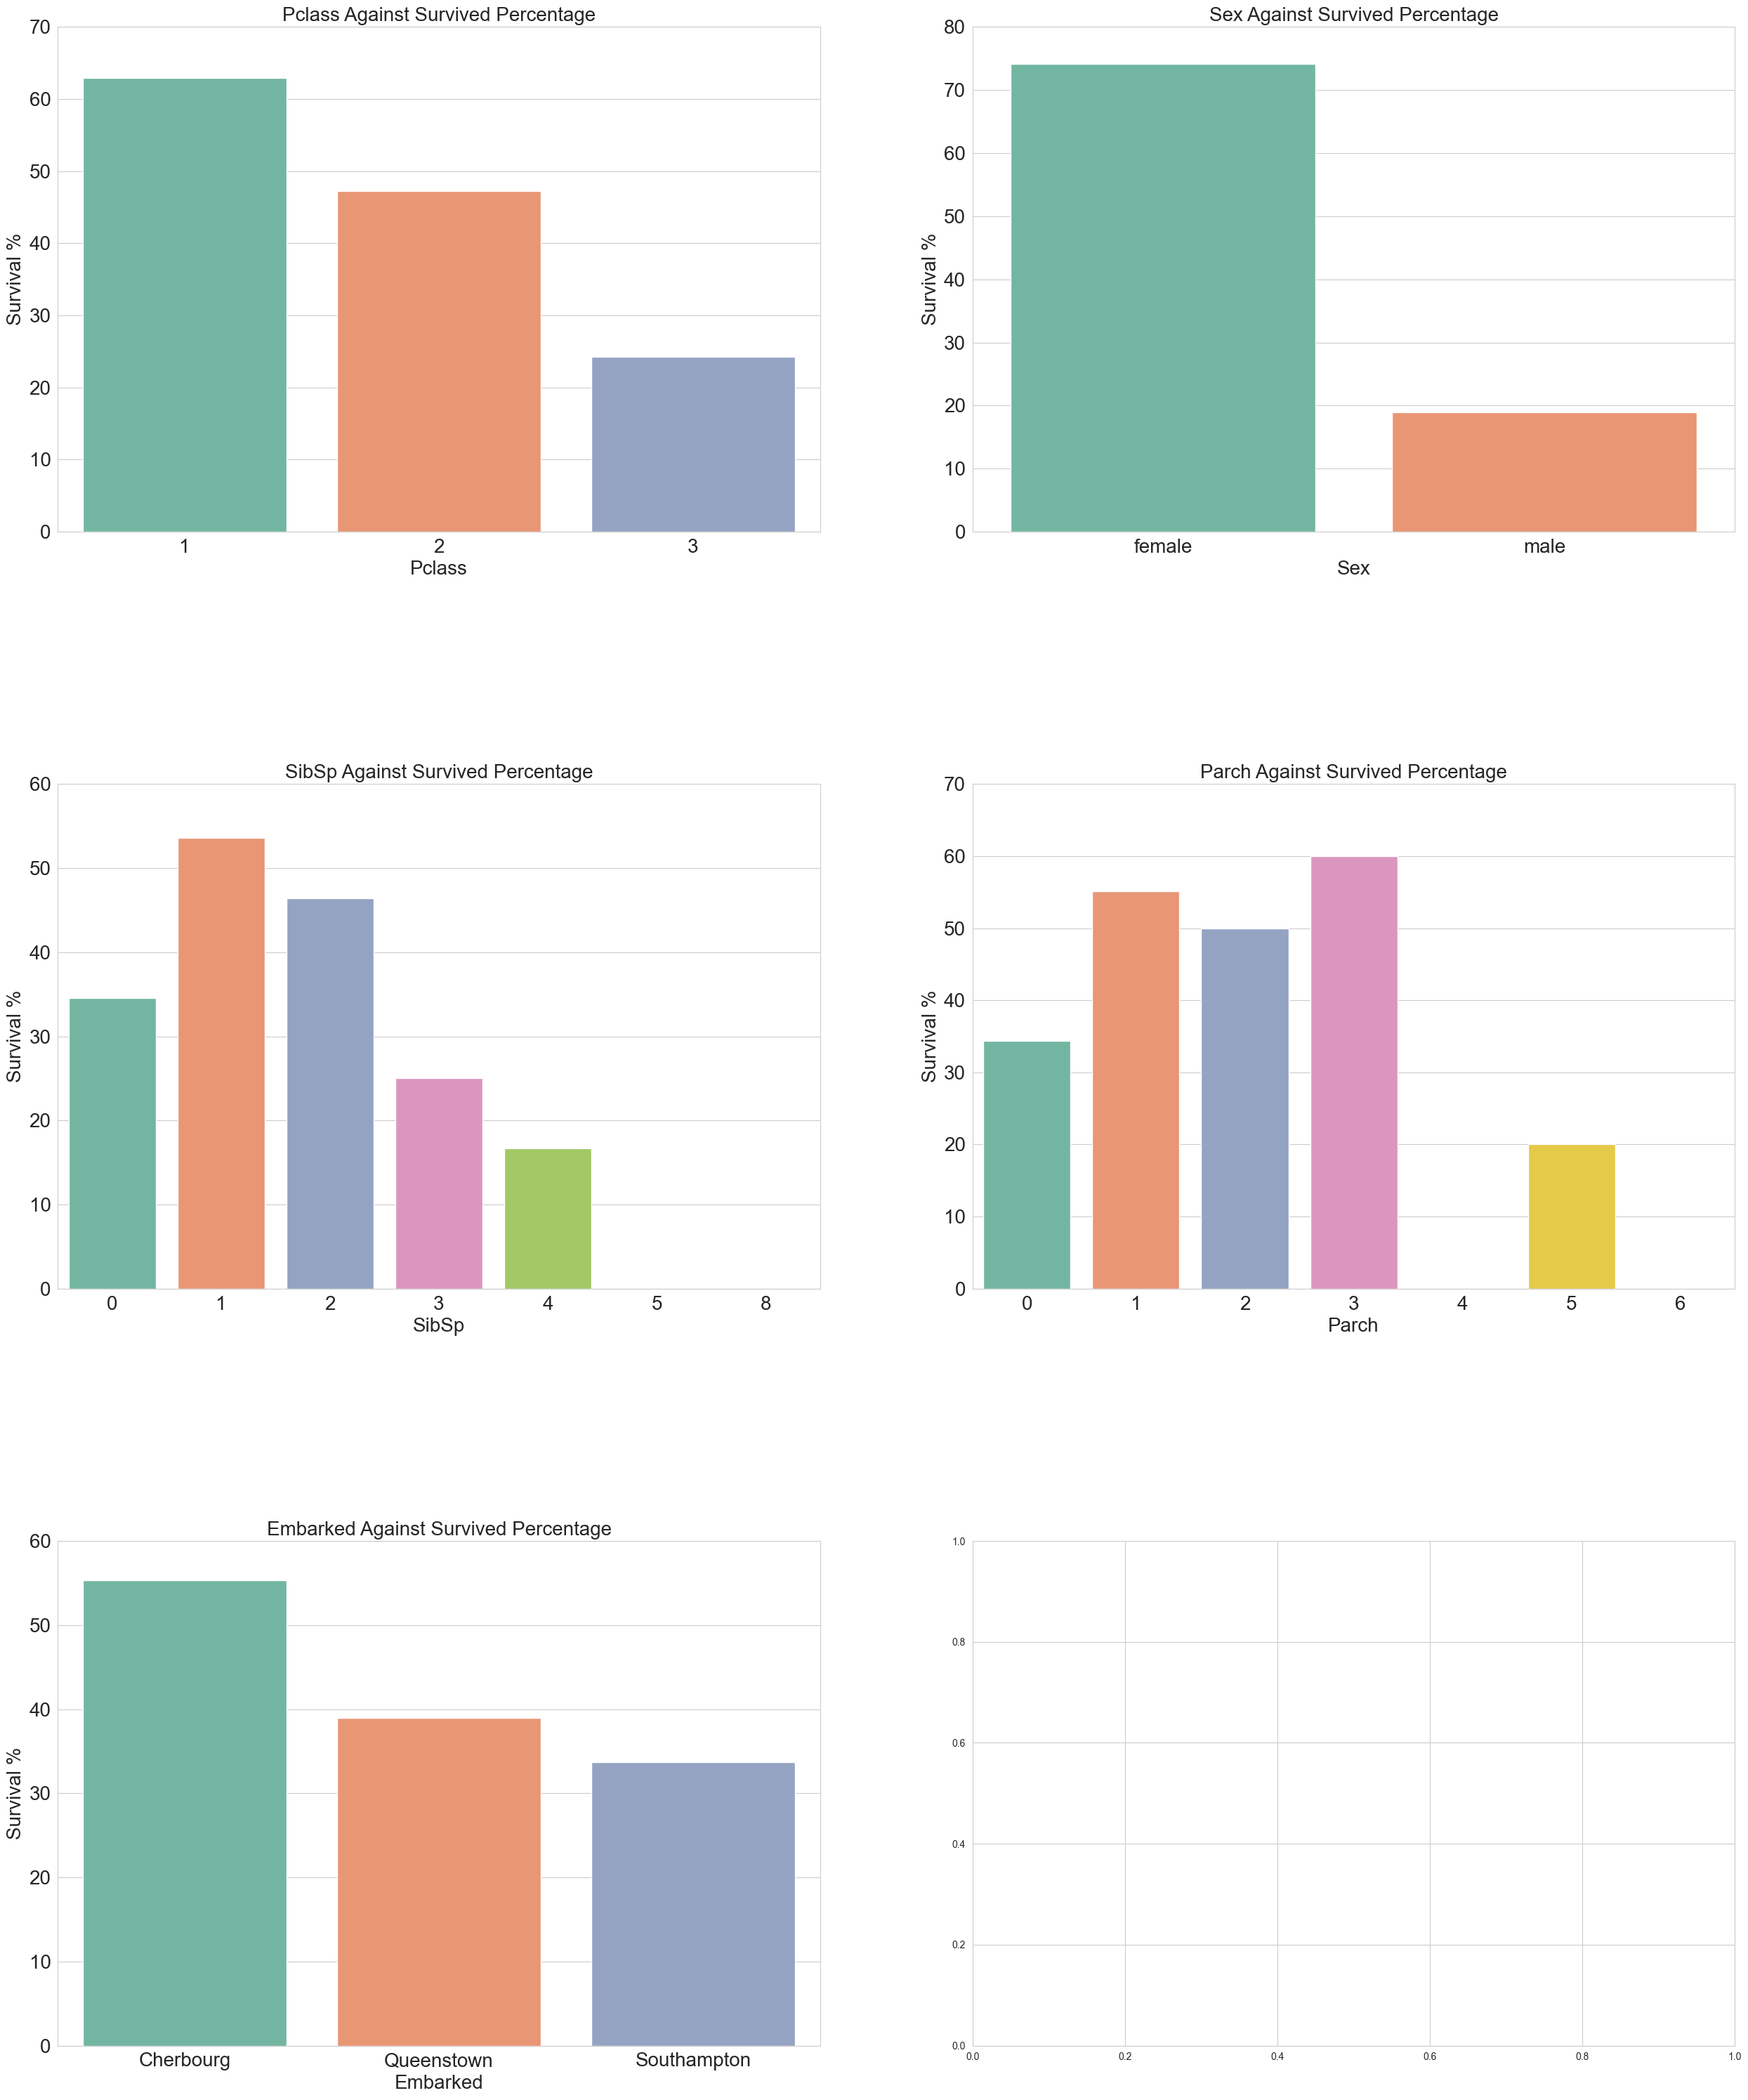

In [57]:
bivariate_cat(dataframe=relevant_cat, target_var="Survived")